<a href="https://colab.research.google.com/github/amirda9/dataMiningNotebooks/blob/master/NN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [105]:
X = np.array([[0.5197,0],
[0.4404, 5],
[0.4850 ,10],
[0.4222, 15],
[0.4132 ,20],
[0.4371, 25],
[0.3912 ,30],
[0.3949, 35],
[1.3910, 40],
[0.4276, 45],
[0.4075, 50],
[0.3956 ,55],
[2.4053, 60],
[0.4752 ,65],
[0.5032 ,70],
[0.5273 ,75],
[0.4879 ,80]])

In [106]:
Cartesian = [[x[0]*math.cos(x[1]*2*np.pi/360),x[0]*math.sin(x[1]*2*np.pi/360)] for x in X]
Cartesian

[[0.5197, 0.0],
 [0.4387241450396048, 0.03838338910606866],
 [0.47763176021092085, 0.08421936616846121],
 [0.40781388385924466, 0.10927340084228426],
 [0.38828099090873736, 0.14132272322216632],
 [0.3961471337137197, 0.18472644220685971],
 [0.33878913796047244, 0.19559999999999997],
 [0.32348314228972286, 0.22650533471502807],
 [1.0655678203784984, 0.8941175650739761],
 [0.30235885963536774, 0.3023588596353677],
 [0.2619359509472648, 0.3121631105709835],
 [0.22690683822047386, 0.32405654872072515],
 [1.2026500000000002, 2.08305090372271],
 [0.2008281979791804, 0.4306774603998161],
 [0.17210453612147655, 0.47285332677946906],
 [0.1364752824825592, 0.5093326882022257],
 [0.08472294588369535, 0.4804877026946563]]

In [107]:
np.array(Cartesian)[:,0].shape

(17,)

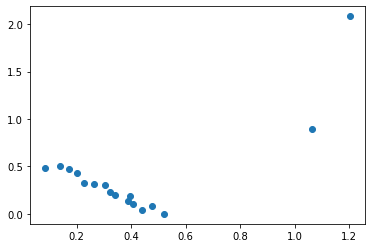

In [108]:
plt.scatter(np.array(Cartesian)[:,0],np.array(Cartesian)[:,1])

In [109]:
w = 1/2*(np.array(Cartesian)[:,1].reshape(17,1) * np.linalg.pinv(np.array(Cartesian)[:,0].reshape(17,1)))

In [110]:
w.shape

(17, 17)

In [111]:
Ypred = w * np.array(Cartesian)[:,0].reshape(17,1)

In [112]:
Ypred = np.matmul(w,np.array(Cartesian)[:,0].reshape(17,1))

In [113]:
Ypred.shape

(17, 1)

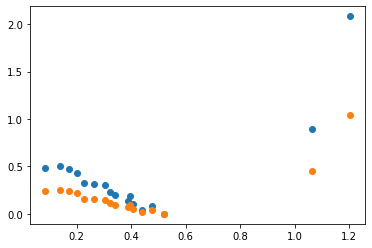

In [114]:
plt.scatter(np.array(Cartesian)[:,0],np.array(Cartesian)[:,1] )
plt.scatter(np.array(Cartesian)[:,0],Ypred )

In [115]:
MSE=0
for i in range(np.array(Cartesian).shape[0]):
  MSE+=((np.array(Cartesian)[i,1]-Ypred[i])**2)

In [116]:
MSE

array([1.62398876])

In [120]:
ransac = linear_model.RANSACRegressor()
ransac.fit(np.array(Cartesian)[:,0].reshape(17,1), np.array(Cartesian)[:,1].reshape(17,1))
Yransac = ransac.predict(np.array(Cartesian)[:,0].reshape(17,1))

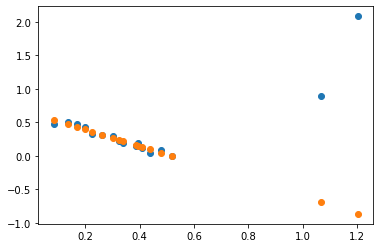

In [121]:
plt.scatter(np.array(Cartesian)[:,0],np.array(Cartesian)[:,1] )
plt.scatter(np.array(Cartesian)[:,0],Yransac )

In [122]:
MSE_RANSAC=0
for i in range(np.array(Cartesian).shape[0]):
  MSE_RANSAC+=((np.array(Cartesian)[i,1]-Yransac[i])**2)

In [123]:
MSE_RANSAC

array([11.246659])